https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c

In [8]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import cufflinks as cf
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
#plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('data/Energy.csv', index_col='DATE', parse_dates=['DATE'])
df.head()

C:\Users\psahai\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.

C:\Users\psahai\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



,IPG2211A2N
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [10]:
df.columns = ['Energy Production']

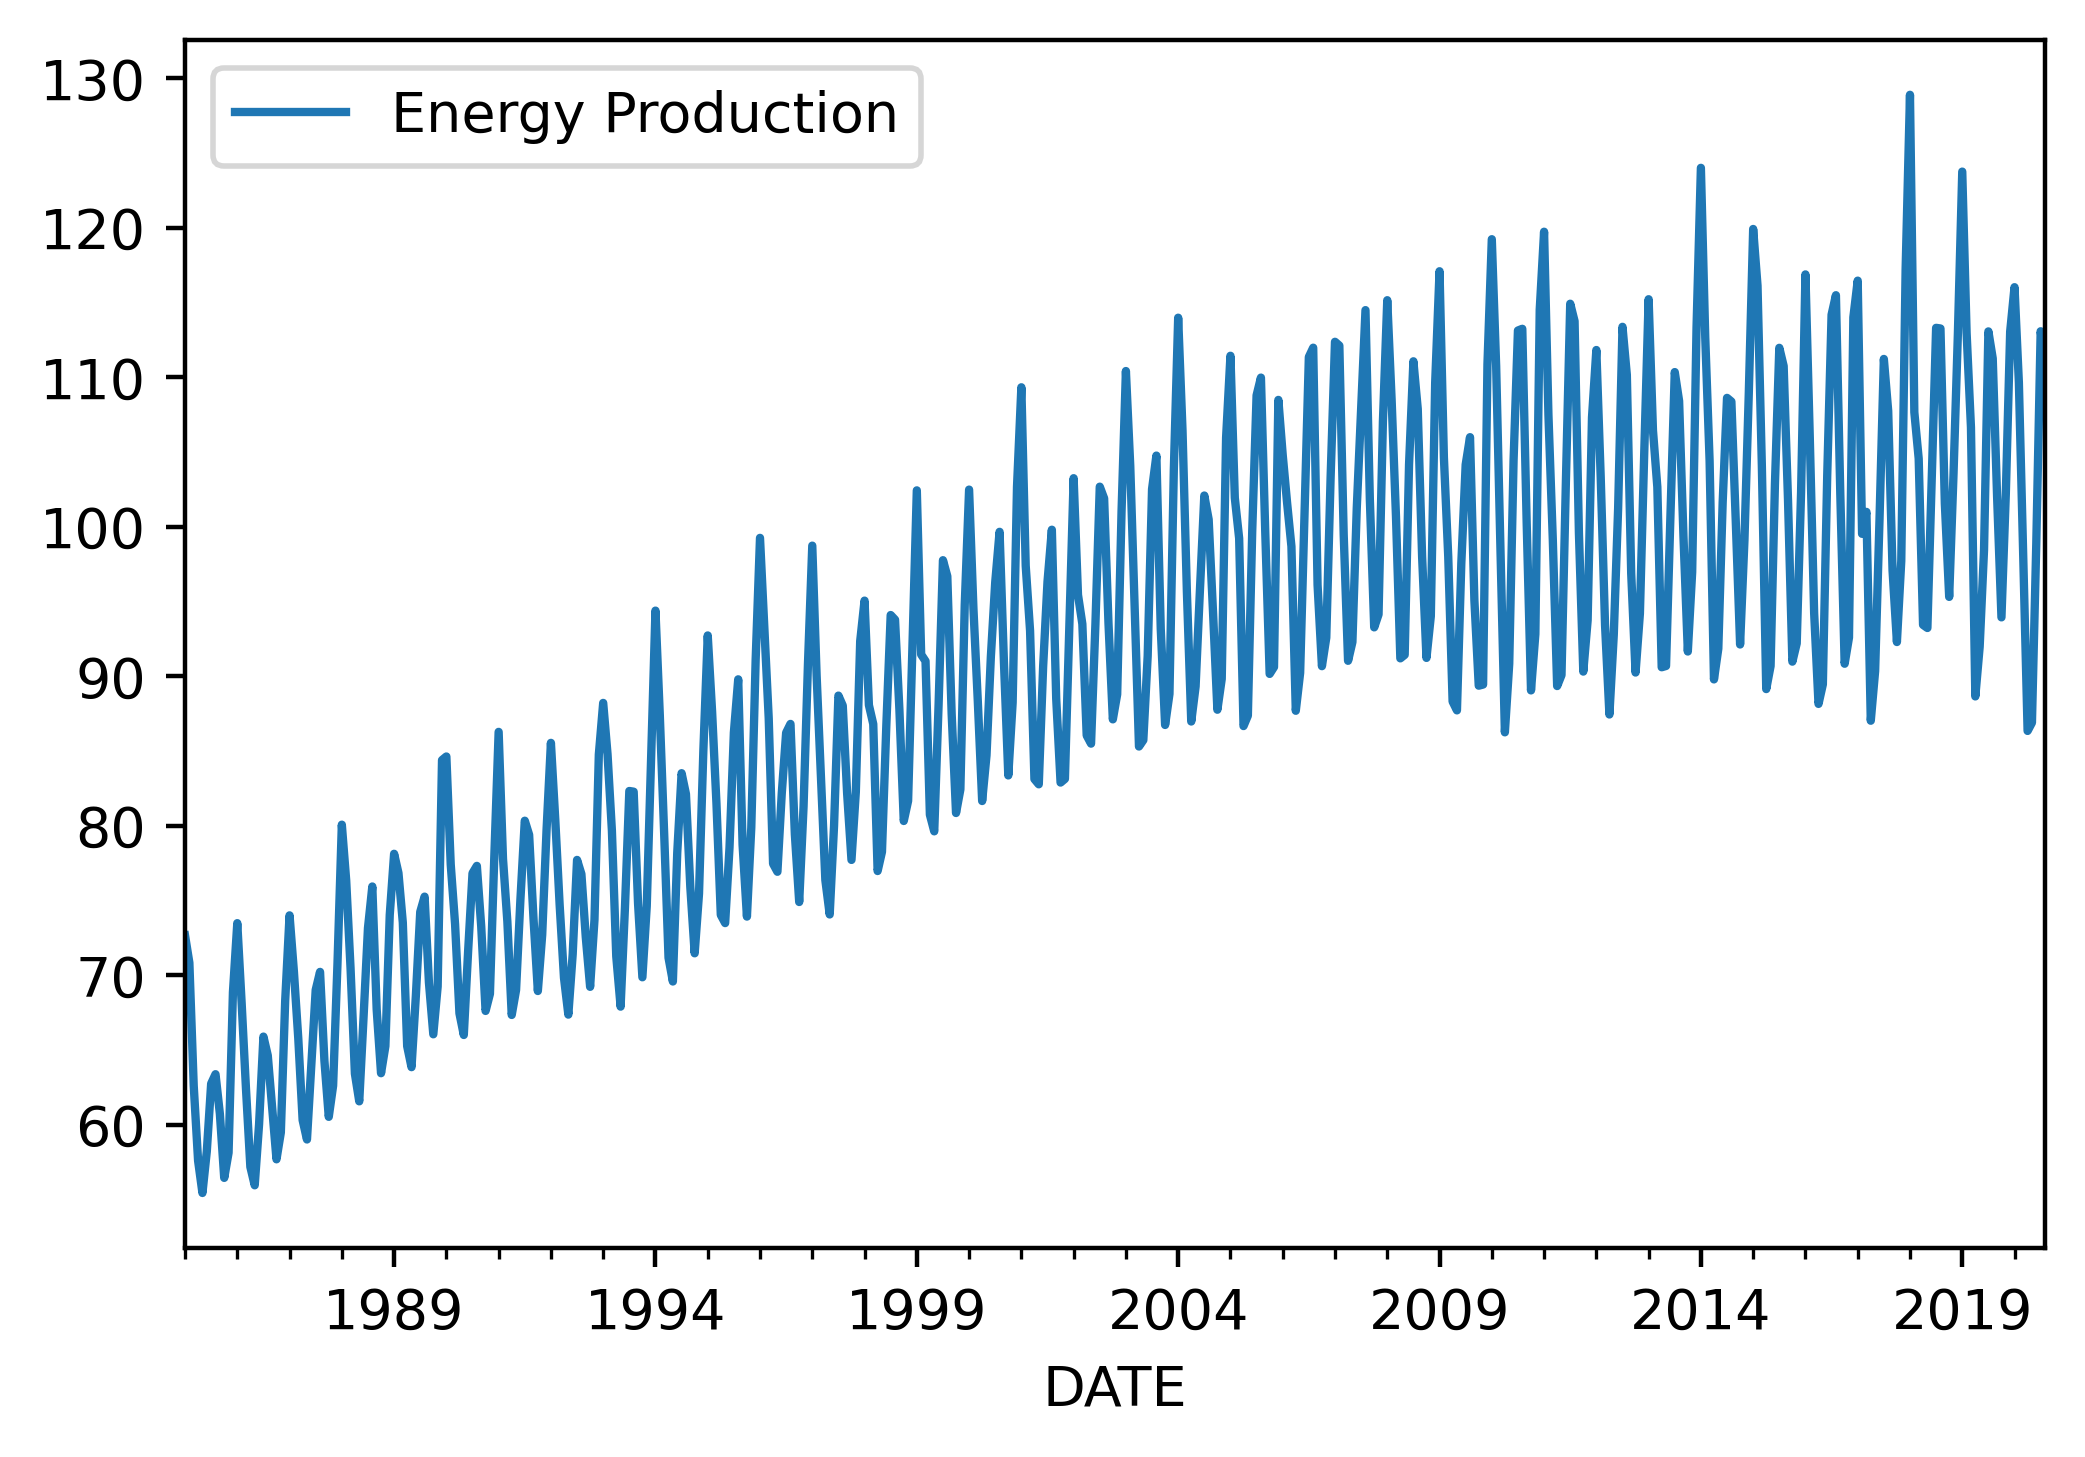

In [16]:
df.plot()

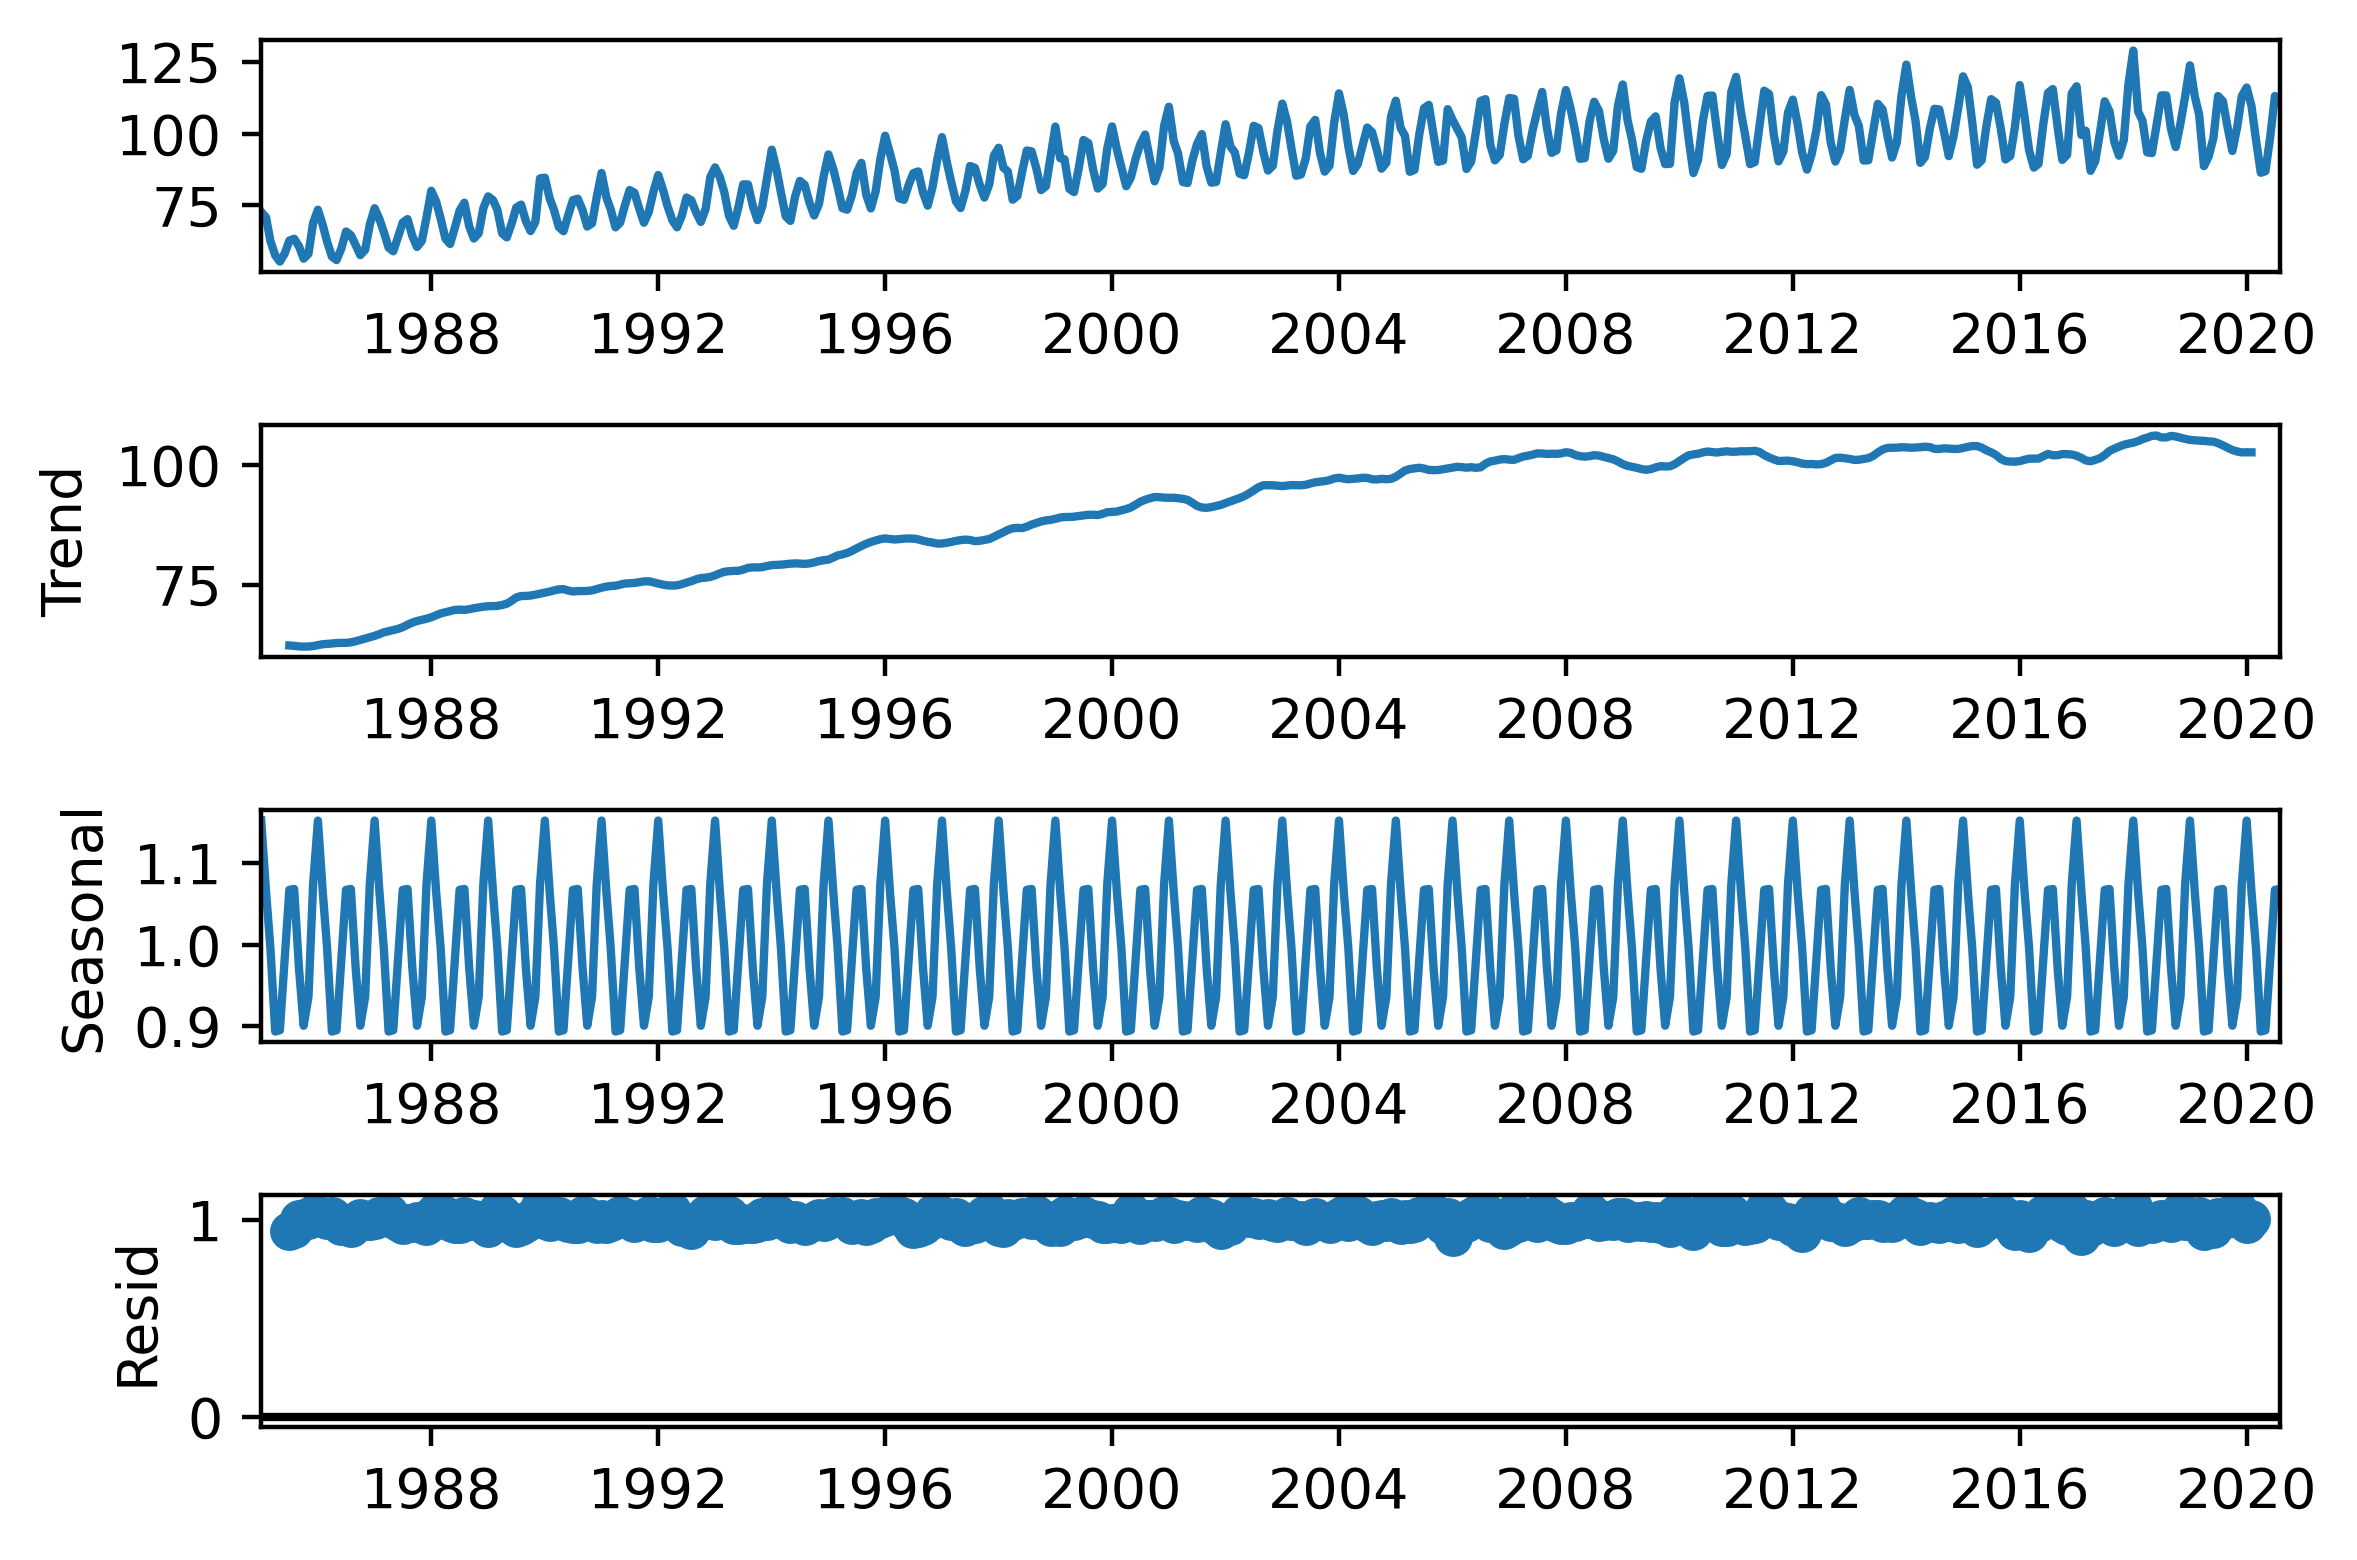

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_results = seasonal_decompose(df, model='multiplicative')
decomp_results.plot()
plt.show()

In [21]:
import pmdarima as pm
stepwise_model  = pm.auto_arima(df, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1958.737, Time=0.89 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2201.876, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2129.321, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2008.778, Time=0.47 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2098.205, Time=0.29 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1957.995, Time=1.18 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=2053.061, Time=0.75 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=1939.741, Time=3.16 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1995.983, Time=2.53 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=1930.416, Time=5.28 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1953.812, Time=4.20 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=1973.206, Time=4.09 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=2001.433, Time=3.56 sec
 ARIMA(2,1,1)(2,1,2)[12]             : AIC=1932.408, Time=6.77 sec
 ARIMA(1,1,2)(2,1,2

In [70]:
train = df.loc['1985-01-01':'2015-12-01']
train2 = df.loc['2010-01-01':'2015-12-01']
test = df.loc['2016-01-01':]
test2 =df.loc['2017-01-01':]
len(test)

56

In [66]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True)

In [53]:
future_forecast = stepwise_model.predict(n_periods=44)
len(future_forecast)

44

In [54]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

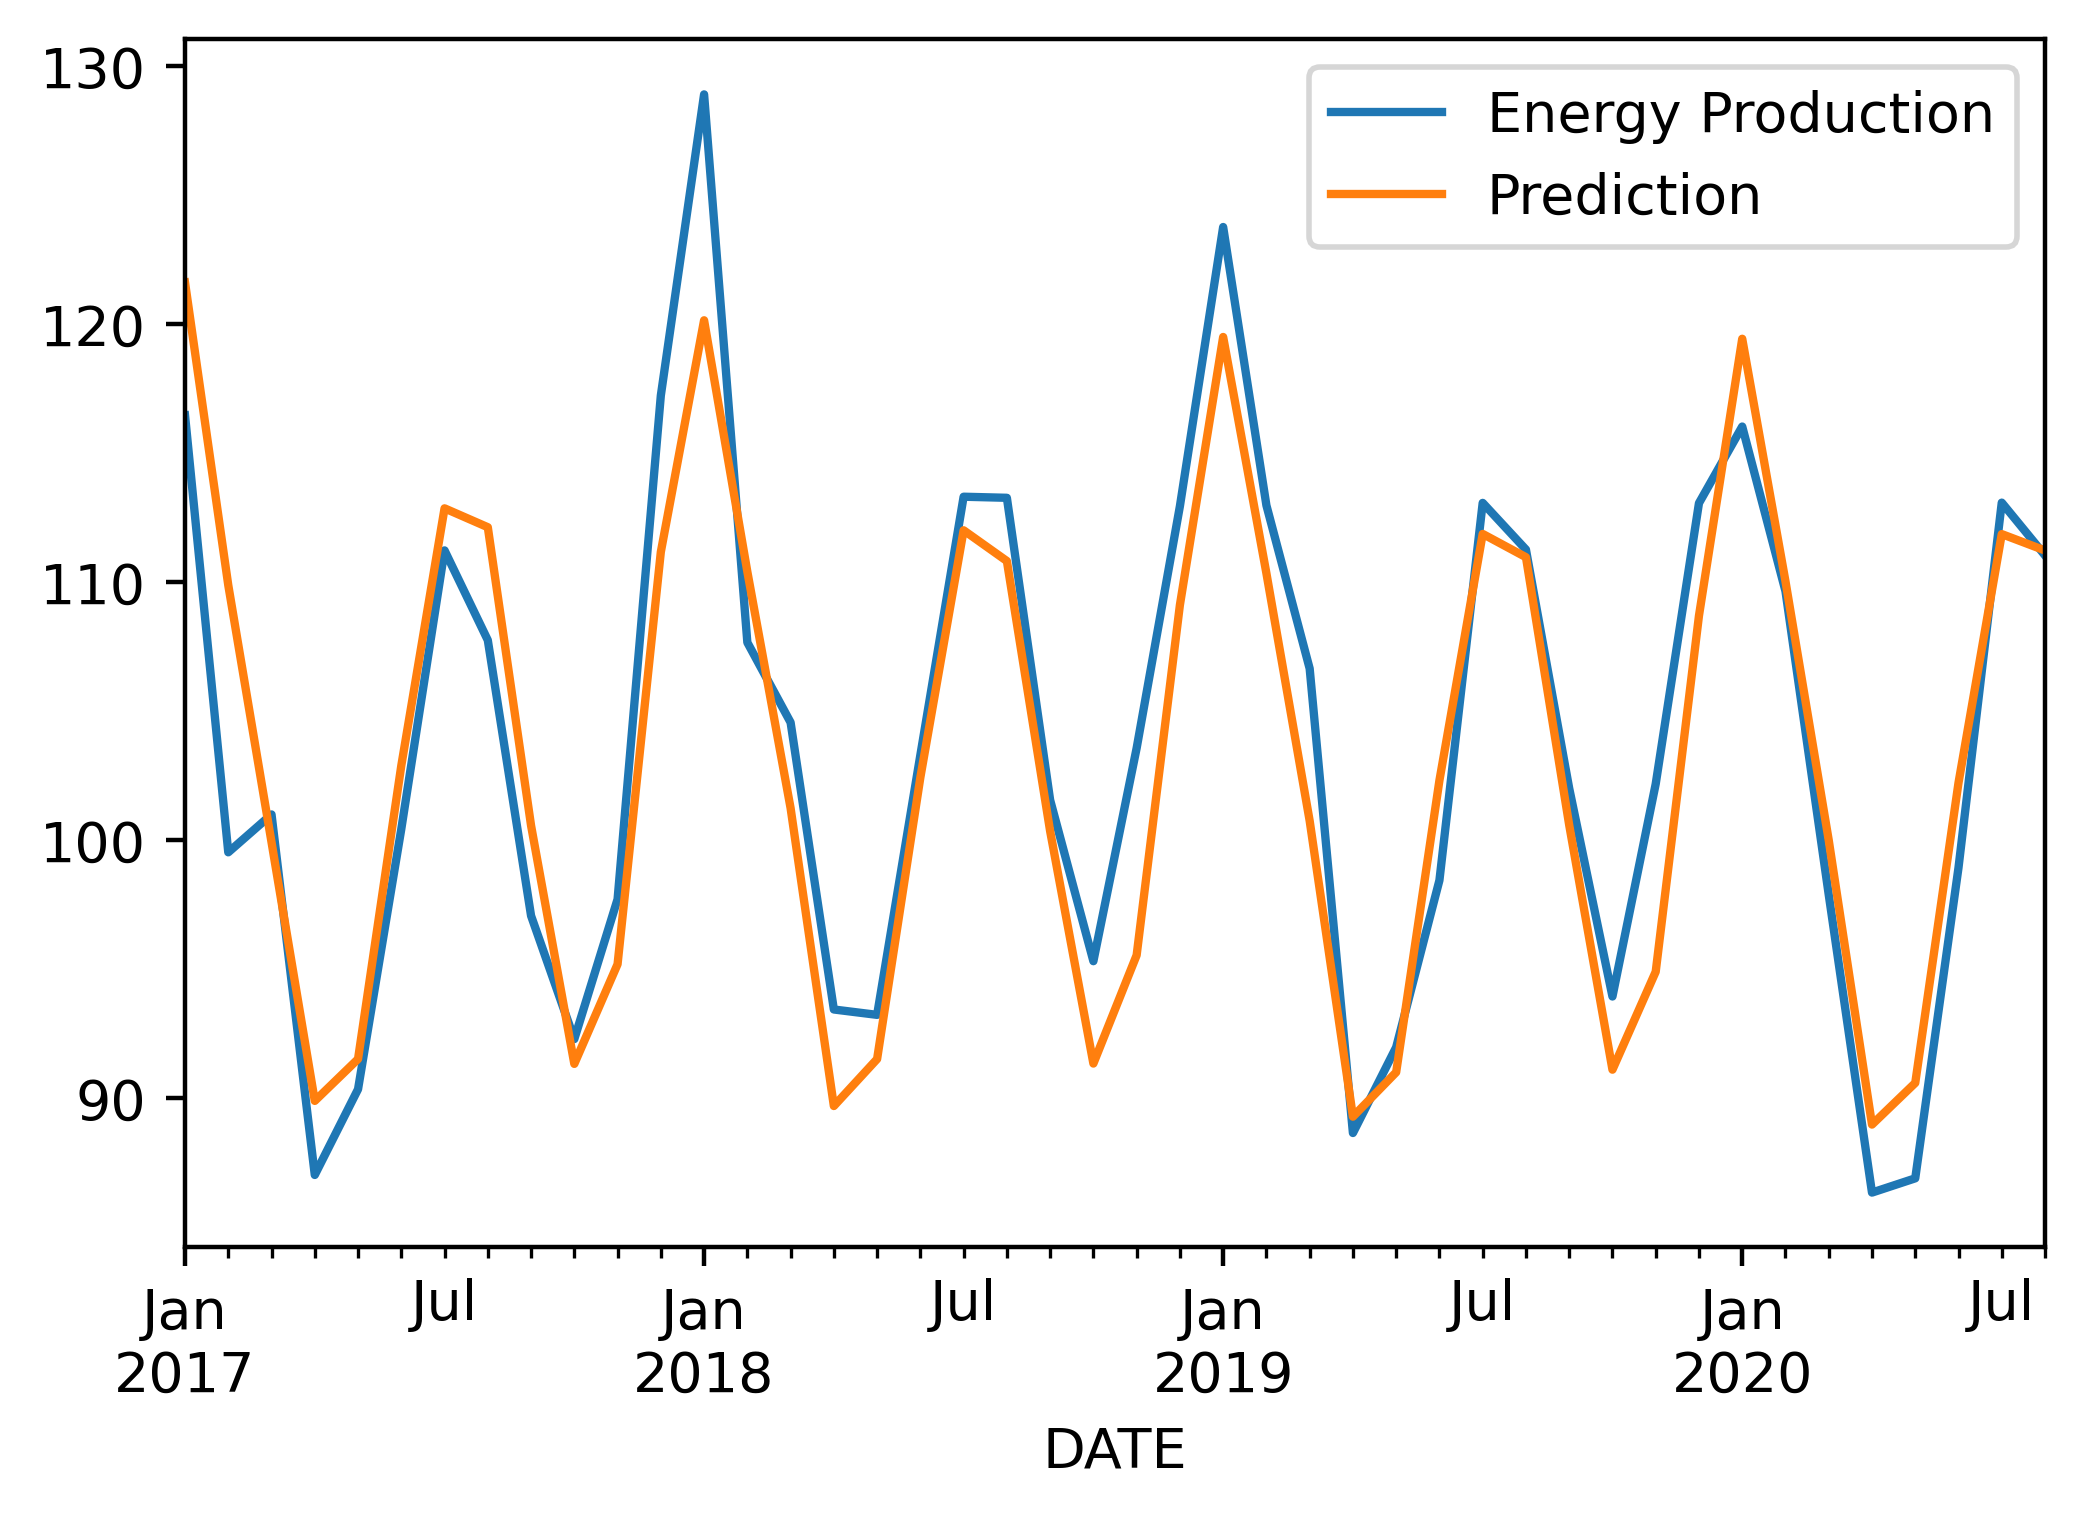

In [55]:
pd.concat([test,future_forecast],axis=1).plot()

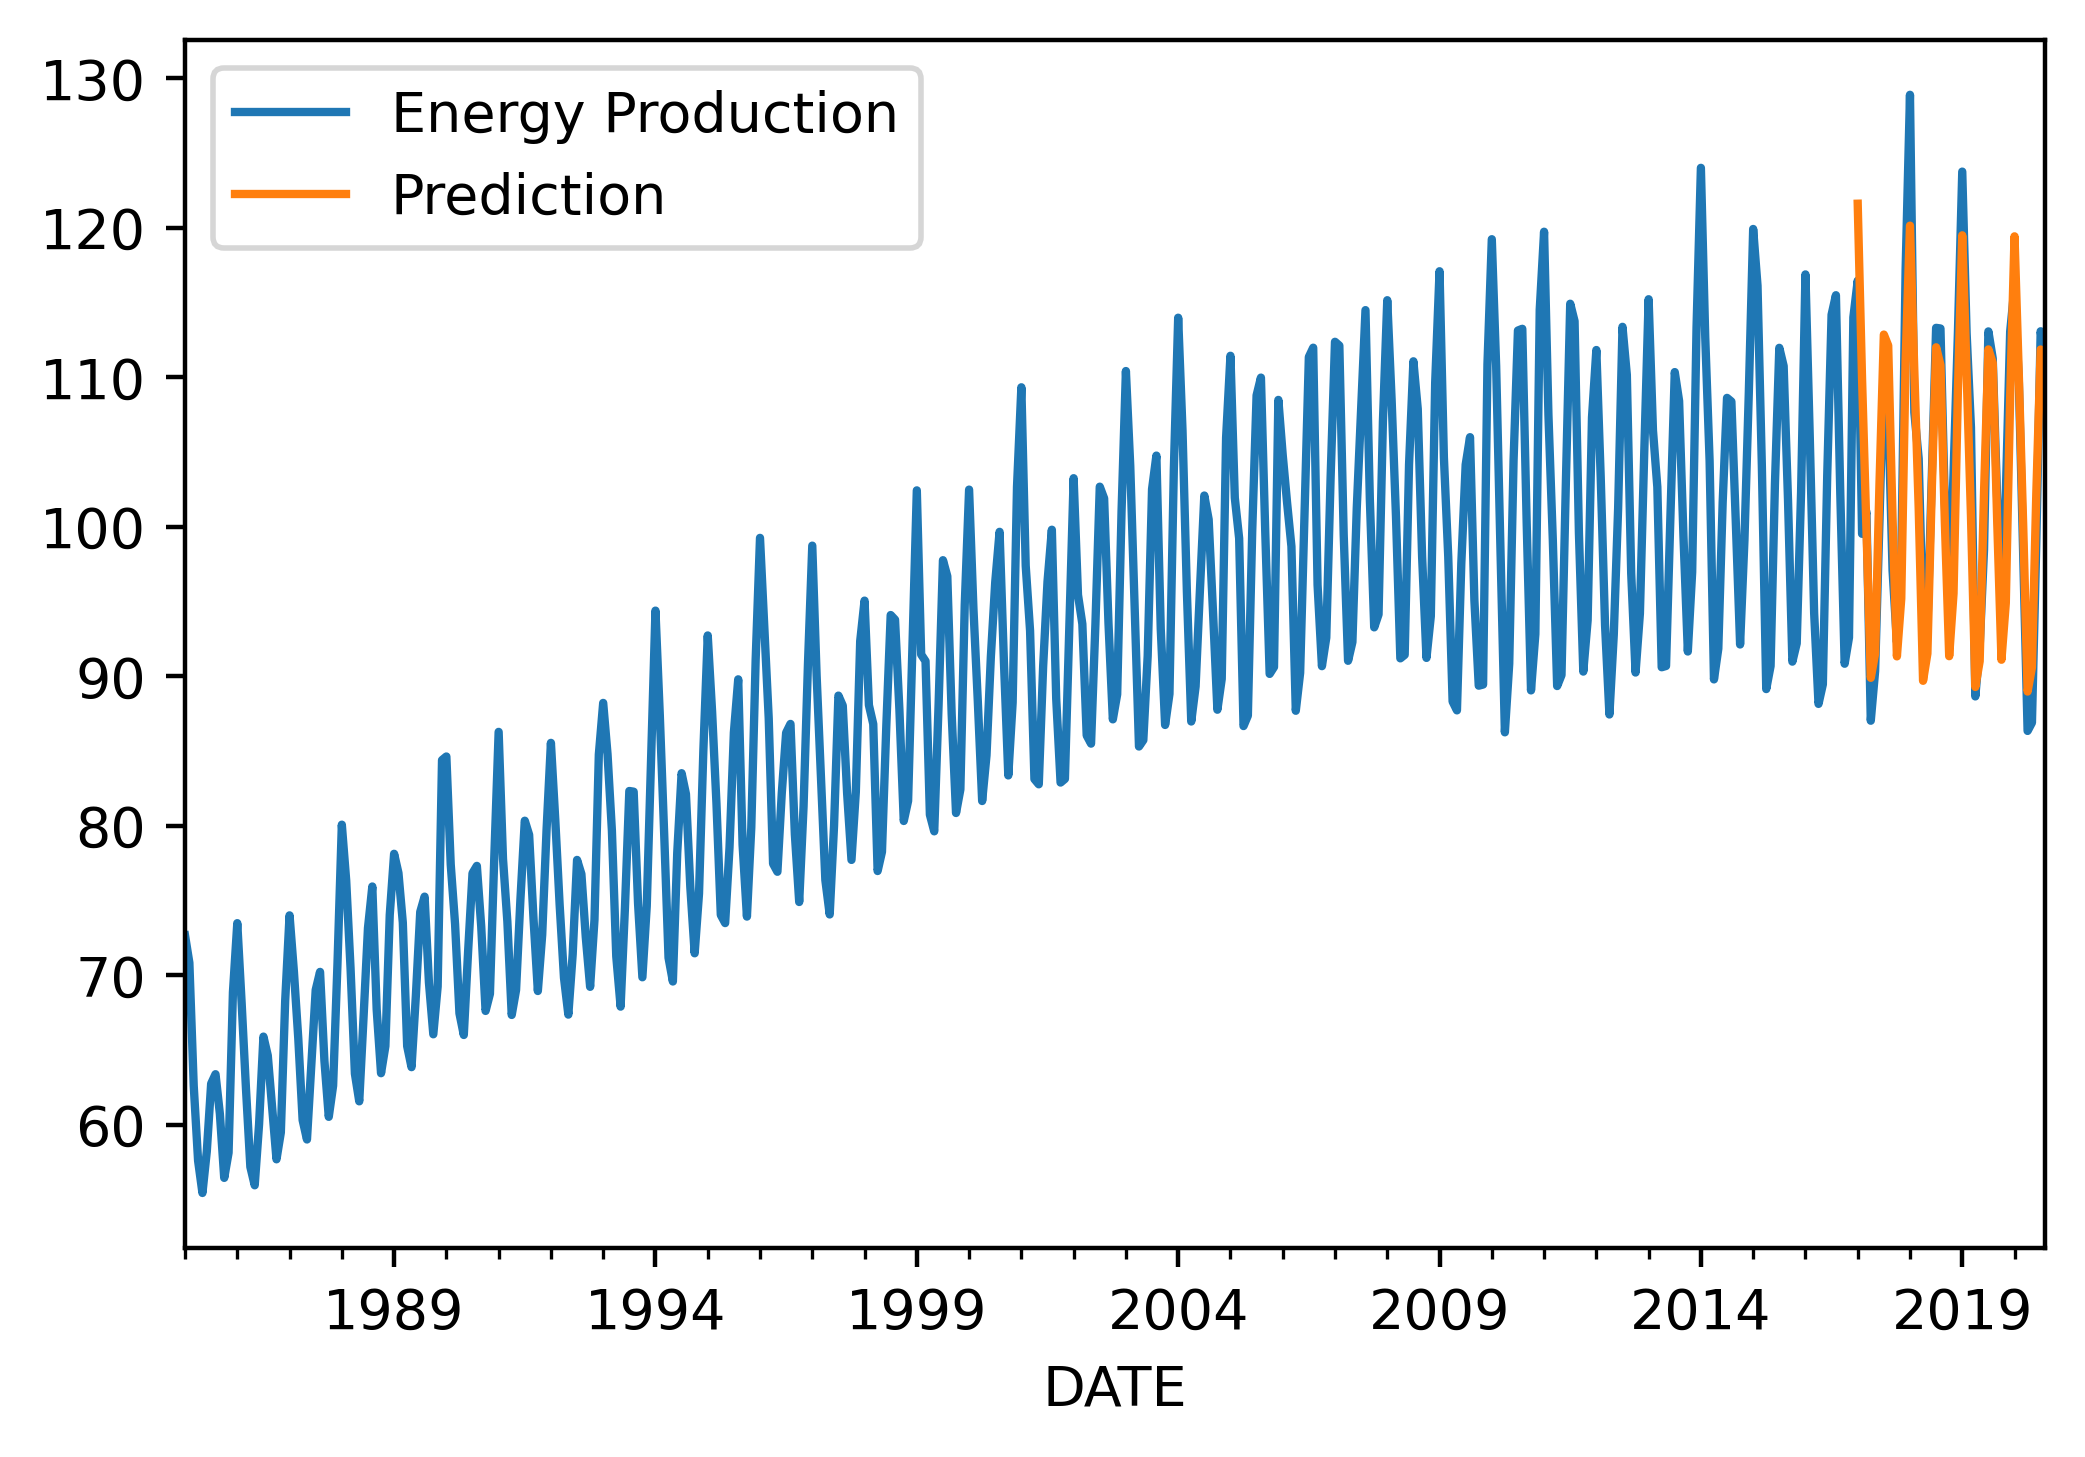

In [56]:
pd.concat([df,future_forecast],axis=1).plot()

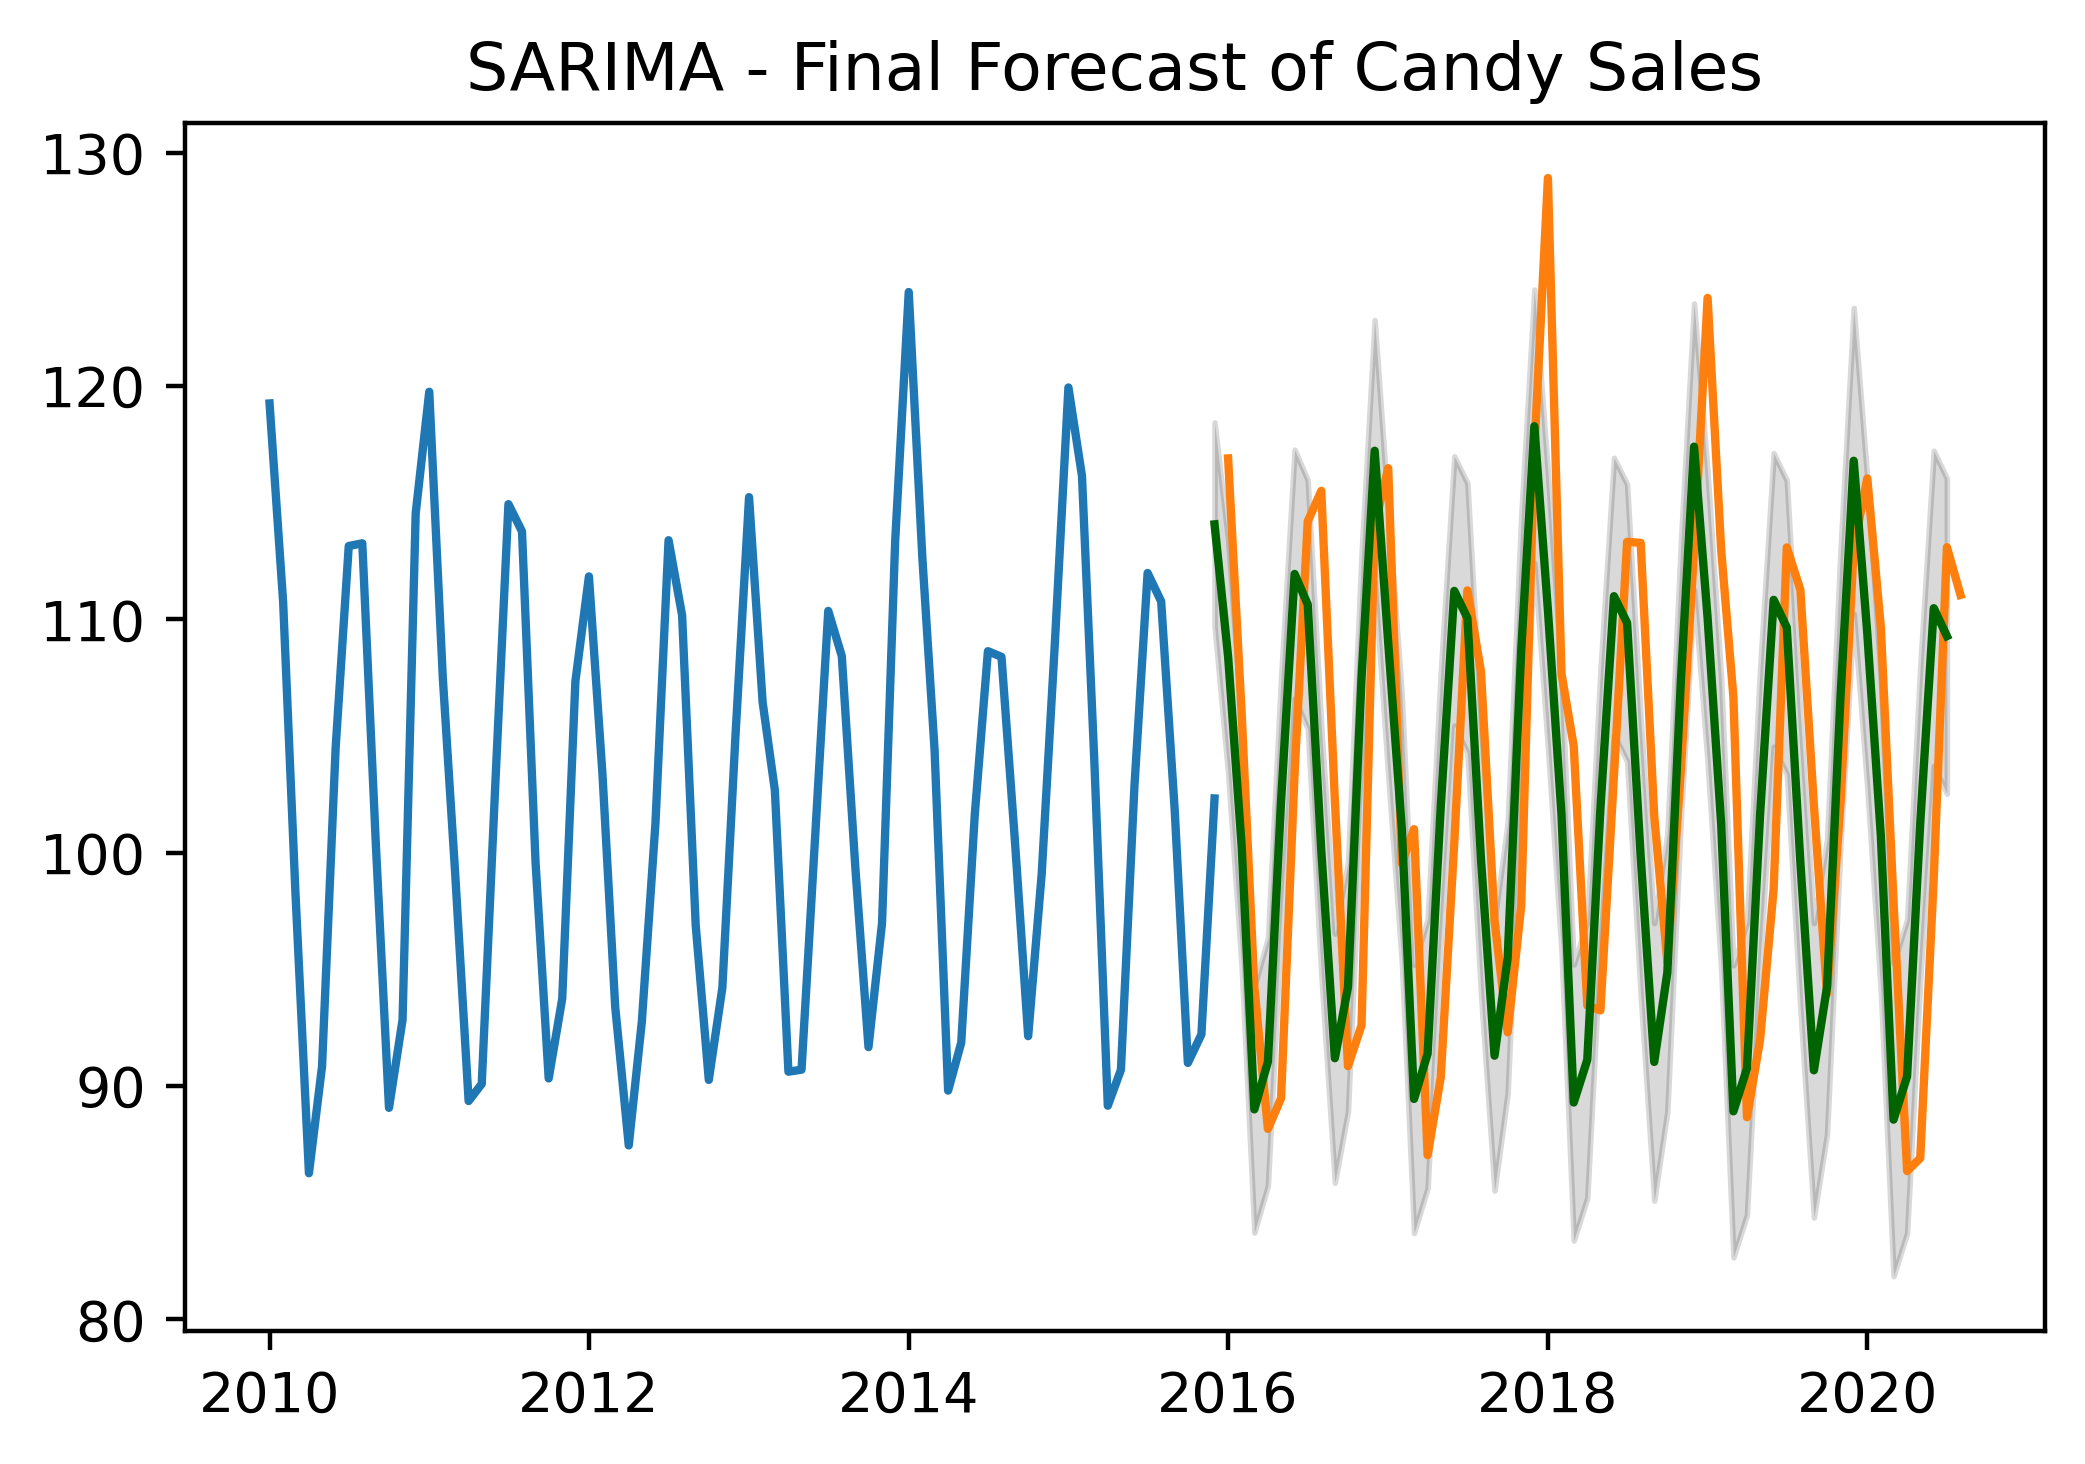

In [78]:
# Forecast
n_periods =56
fitted, confint = stepwise_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(train2.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot

plt.plot(train2)
plt.plot(test)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Candy Sales")
plt.show()